In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset (replace 'train_data.csv' and 'test_data.csv' with your actual file names)
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# Separate features (X) and labels (y)
X_train = train_df.drop(columns=['isFraud'])  # Replace 'isFraud' with the name of your target column
y_train = train_df['isFraud']

X_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']


In [3]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Define the Sequential mlp
mlp = Sequential()

# Add the first hidden layer with 64 neurons and ReLU activation
mlp.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Add the second hidden layer with 32 neurons and ReLU activation
mlp.add(Dense(32, activation='relu'))

# Add the output layer with 1 neuron (for binary classification) and sigmoid activation
mlp.add(Dense(1, activation='sigmoid'))


c:\Users\Harman\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
mlp.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [6]:
# Train the model
history = mlp.fit(X_train_scaled, y_train, epochs=5, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/5
158861/158861 ━━━━━━━━━━━━━━━━━━━━ 130s 805us/step - accuracy: 0.9802 - loss: 0.0524 - val_accuracy: 0.9833 - val_loss: 0.0429
Epoch 2/5
158861/158861 ━━━━━━━━━━━━━━━━━━━━ 131s 822us/step - accuracy: 0.9909 - loss: 0.0246 - val_accuracy: 0.9970 - val_loss: 0.0092
Epoch 3/5
158861/158861 ━━━━━━━━━━━━━━━━━━━━ 122s 763us/step - accuracy: 0.9922 - loss: 0.0212 - val_accuracy: 0.9968 - val_loss: 0.0088
Epoch 4/5
158861/158861 ━━━━━━━━━━━━━━━━━━━━ 992s 6ms/step - accuracy: 0.9930 - loss: 0.0193 - val_accuracy: 0.9921 - val_loss: 0.0205
Epoch 5/5
158861/158861 ━━━━━━━━━━━━━━━━━━━━ 197s 1ms/step - accuracy: 0.9935 - loss: 0.0179 - val_accuracy: 0.9887 - val_loss: 0.0309


In [11]:
# Make predictions on the test data
y_pred = mlp.predict(X_test_scaled)

# Since the output is sigmoid, we'll threshold at 0.5 for binary classification
y_pred = (y_pred >0.99).astype(int)

print(f"Predictions: {y_pred[:10]}")  # Print the first 10 predictions

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 30s 751us/step
Predictions: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [12]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_mlp = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_mlp*100:.2f}%\n")

Accuracy: 99.90%



In [13]:
classification_mlp = classification_report(y_test,y_pred)
print(f"Classification Report: {classification_mlp}")

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.59      0.86      0.70      1643

    accuracy                           1.00   1272524
   macro avg       0.79      0.93      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524



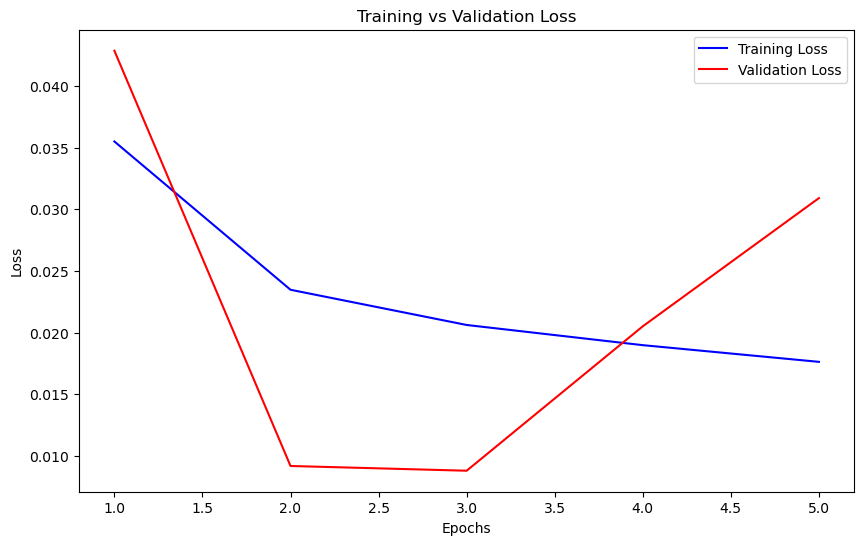

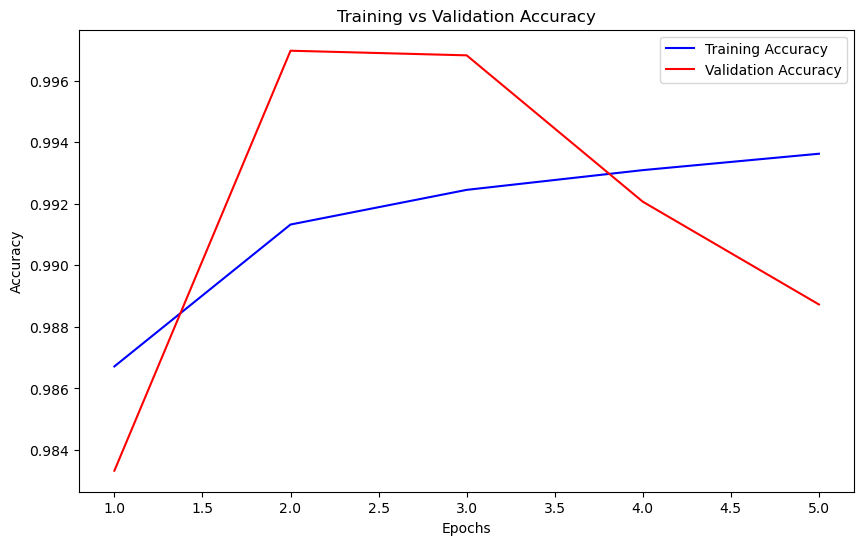

In [14]:
import matplotlib.pyplot as plt

# Access training and validation metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Training & Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()